#Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Import necessary libraries for data processing, model training, visualization & performance metrics
from fastai.vision.all import *
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import torch.nn as nn
import random

# Setting a seed for reproducibility
random.seed(42)

In [3]:
# Define path to data
path = Path('/content/gdrive/My Drive/477 Project - Fall 2023/Capacitive Images IPCCC2016 Rilvan/ex1')

In [4]:
# Function to retrieve all image files from 'fingers' directories
def get_fingers_image_files(path):
    return [p for p in path.rglob('fingers/*.jpg')]

# Function to label the items (Used in datablock)
def label_func(f): return f.parent.parent.name

# Function to determine if a file is in the validation set (Used in datablock)
def is_valid_func(f):
    return f in valid_files

In [5]:
# Retrieve all fingers images
all_files = get_fingers_image_files(path)

# Get all labels from the file paths
all_labels = [label_func(f) for f in all_files]

# Split the data into a 60% training set and a 40% temporary set (to be divided into validation and test sets), stratified by labels
train_files, temp_files, train_labels, temp_labels = train_test_split(all_files, all_labels, test_size=0.4, stratify=all_labels, random_state=42)

# Split the remaining 40% of data equally between validation and test sets, resulting in a final split of 60% train, 20% valid, and 20% test
valid_files, test_files, valid_labels, test_labels = train_test_split(temp_files, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

In [6]:
# This script counts and displays the number of image files associated with
# each individual by extracting the user's name from the file path structure.

counts = defaultdict(int)

# Function to extract the name from the file path
def get_name_from_file(file_path):
    name = file_path.parent.parent.name
    return name.lower()

# Update the counts for each file
for f in all_files:
    name = get_name_from_file(Path(f))
    counts[name] += 1

# Print out the counts
for name, count in sorted(counts.items()):
    print(f"{name}: {count}")

bree: 20
cody: 20
dennis: 20
eric: 20
evanmoyher: 20
isaiah: 20
jesse: 20
john: 20
justin: 20
kevin: 20
kolby: 20
kristina: 20
lamarque: 20
maddie: 20
mohamed: 20
mudhasir: 20
sal: 20
thomas: 20
veronica: 20
victor: 20
yodsapath: 20


#Dataloader

In [7]:
# Create a DataBlock
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=FuncSplitter(is_valid_func),
                   get_y=label_func
                   )

# Create a Dataloader from the train and valid files
dls = dblock.dataloaders(train_files + valid_files, bs=32)

In [8]:
dls.vocab

['Bree', 'Cody', 'Dennis', 'Eric', 'EvanMoyher', 'Isaiah', 'Jesse', 'John', 'Justin', 'Kevin', 'Kolby', 'Kristina', 'Lamarque', 'Maddie', 'Mohamed', 'Mudhasir', 'Sal', 'Thomas', 'Veronica', 'Victor', 'yodsapath']

In [9]:
# Display # of batches in each set
print(f"Number of batches in the training set: {len(dls.train)}")
print(f"Number of batches in the validation set: {len(dls.valid)}")

# Display # of samples in each set
print(f"Number of samples in the training set: {len(dls.train_ds)}")
print(f"Number of samples in the validation set: {len(dls.valid_ds)}")

Number of batches in the training set: 7
Number of batches in the validation set: 3
Number of samples in the training set: 252
Number of samples in the validation set: 84


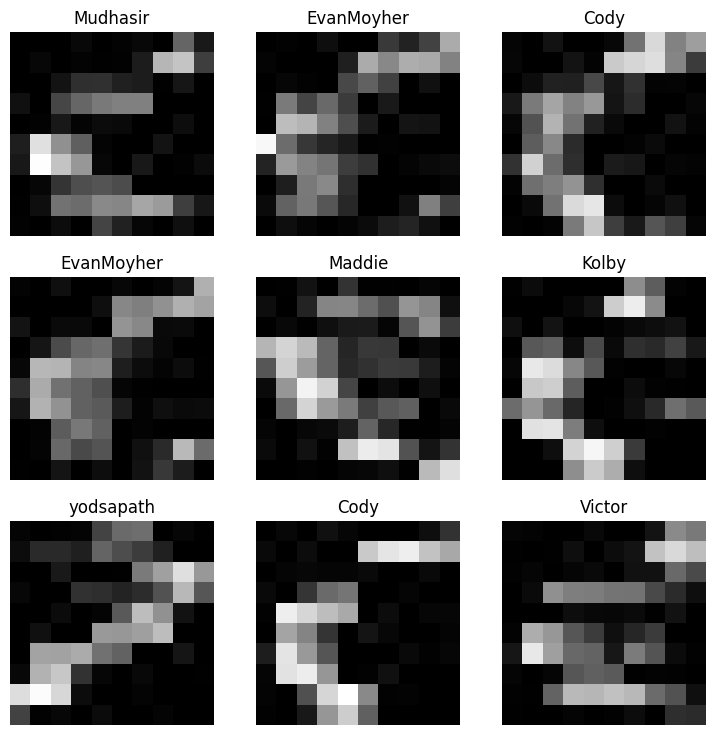

In [10]:
dls.show_batch()

#Training

In [14]:
loss_func = nn.CrossEntropyLoss()

#Create learner
learn = vision_learner(dls, resnet18, metrics=[error_rate], opt_func=Adam, loss_func = loss_func)

SuggestedLRs(valley=0.0010000000474974513)

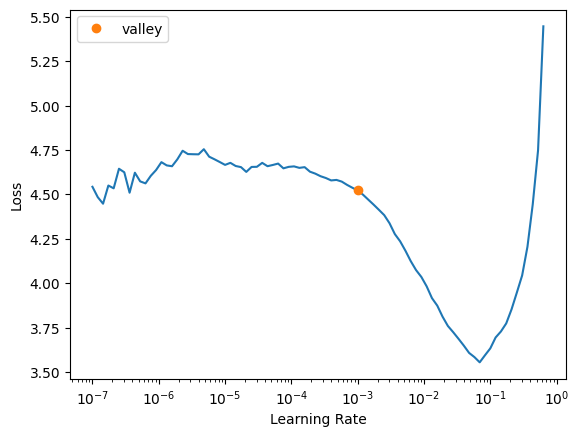

In [12]:
# Freeze model except for final layer
learn.freeze()

learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time
0,4.329234,3.115011,0.964286,00:01
1,4.346507,3.143430,0.916667,00:01
2,4.246092,3.154267,0.928571,00:01
3,4.055839,3.002148,0.880952,00:01
4,3.776798,2.676460,0.738095,00:01
5,3.460754,2.427786,0.690476,00:01
6,3.232885,2.244978,0.571429,00:01
7,2.991697,1.962921,0.559524,00:01
8,2.789649,1.939044,0.547619,00:01
9,2.575107,1.816031,0.488095,00:01


Better model found at epoch 0 with valid_loss value: 3.115010976791382.


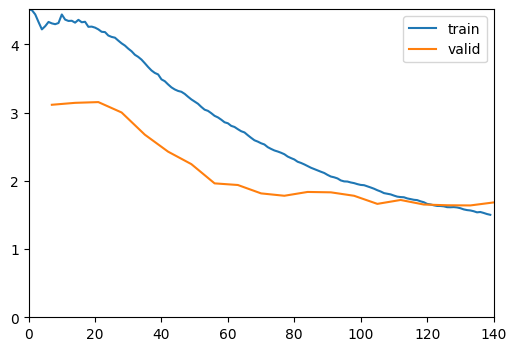

Better model found at epoch 3 with valid_loss value: 3.002147674560547.
Better model found at epoch 4 with valid_loss value: 2.676459789276123.
Better model found at epoch 5 with valid_loss value: 2.427786350250244.
Better model found at epoch 6 with valid_loss value: 2.2449779510498047.
Better model found at epoch 7 with valid_loss value: 1.962921142578125.
Better model found at epoch 8 with valid_loss value: 1.9390442371368408.
Better model found at epoch 9 with valid_loss value: 1.8160314559936523.
Better model found at epoch 10 with valid_loss value: 1.7812271118164062.
Better model found at epoch 13 with valid_loss value: 1.7809946537017822.
Better model found at epoch 14 with valid_loss value: 1.662350058555603.
Better model found at epoch 16 with valid_loss value: 1.6527268886566162.
Better model found at epoch 17 with valid_loss value: 1.6420038938522339.
Better model found at epoch 18 with valid_loss value: 1.6395070552825928.


In [15]:
# Train final layer
learn.fit_one_cycle(20,
    lr_max= 0.001,
    cbs=[
        ShowGraphCallback(),
        SaveModelCallback(monitor='valid_loss', fname='best_model_phase1', every_epoch=False)
        ])

SuggestedLRs(valley=0.0004786300996784121)

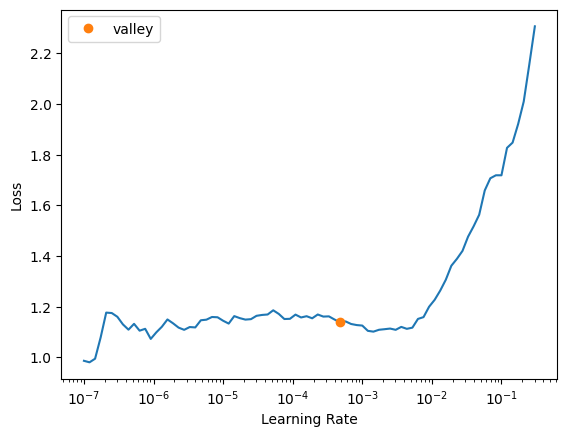

In [16]:
learn.load('best_model_phase1',with_opt=False)

# Unfreeze model
learn.unfreeze()

learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time
0,1.019920,1.475388,0.345238,00:03
1,1.049518,1.593618,0.380952,00:03
2,1.147006,1.668298,0.416667,00:01
3,1.101314,1.279949,0.392857,00:01
4,1.041906,1.494871,0.309524,00:01
5,0.989029,0.989606,0.297619,00:01
6,0.927566,0.794546,0.214286,00:01
7,0.893644,0.951531,0.214286,00:01
8,0.799134,0.651686,0.190476,00:01
9,0.722440,0.521058,0.130952,00:01


Better model found at epoch 0 with valid_loss value: 1.4753881692886353.


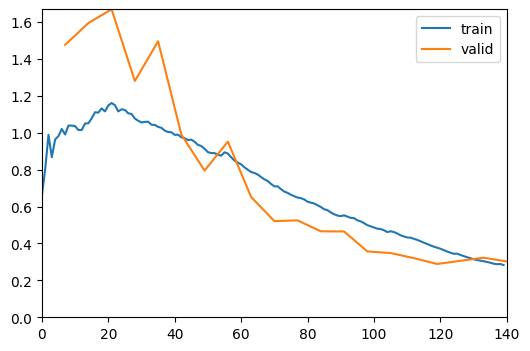

Better model found at epoch 3 with valid_loss value: 1.2799485921859741.
Better model found at epoch 5 with valid_loss value: 0.9896058440208435.
Better model found at epoch 6 with valid_loss value: 0.7945460081100464.
Better model found at epoch 8 with valid_loss value: 0.6516861915588379.
Better model found at epoch 9 with valid_loss value: 0.5210575461387634.
Better model found at epoch 11 with valid_loss value: 0.46563729643821716.
Better model found at epoch 12 with valid_loss value: 0.4647630453109741.
Better model found at epoch 13 with valid_loss value: 0.35665202140808105.
Better model found at epoch 14 with valid_loss value: 0.34788423776626587.
Better model found at epoch 15 with valid_loss value: 0.3204277455806732.
Better model found at epoch 16 with valid_loss value: 0.28864556550979614.


In [17]:
# Train the entire model
learn.fit_one_cycle(
    20,
    lr_max= 0.0004,
    cbs=[
        ShowGraphCallback(),
        SaveModelCallback(monitor='valid_loss', fname='best_model_phase2', every_epoch=False)
        ])

In [18]:
learn.load('best_model_phase2', with_opt=False)

#Validation Set Performance

In [19]:
# Get predictions and targets from learner
preds, targets = learn.get_preds()

# Convert predictions to class label
pred_labels = preds.argmax(dim=-1)


print(classification_report(targets, pred_labels, target_names=dls.vocab))

              precision    recall  f1-score   support

        Bree       0.80      1.00      0.89         4
        Cody       1.00      0.50      0.67         4
      Dennis       1.00      1.00      1.00         4
        Eric       1.00      1.00      1.00         4
  EvanMoyher       1.00      1.00      1.00         4
      Isaiah       0.80      1.00      0.89         4
       Jesse       1.00      1.00      1.00         4
        John       1.00      1.00      1.00         4
      Justin       1.00      1.00      1.00         4
       Kevin       0.75      0.75      0.75         4
       Kolby       1.00      1.00      1.00         4
    Kristina       1.00      1.00      1.00         4
    Lamarque       1.00      1.00      1.00         4
      Maddie       1.00      0.75      0.86         4
     Mohamed       1.00      1.00      1.00         4
    Mudhasir       1.00      1.00      1.00         4
         Sal       1.00      1.00      1.00         4
      Thomas       0.60    

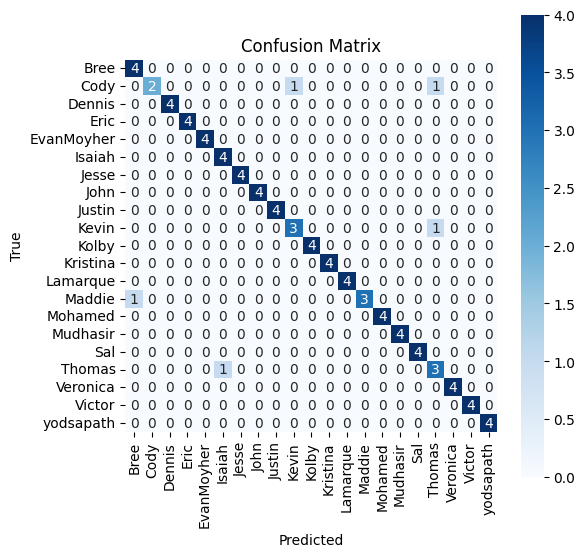

In [20]:
# Calculate the confusion matrix
cm_valid = confusion_matrix(targets, pred_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm_valid, annot=True, fmt='d', cmap='Blues', xticklabels=dls.vocab, yticklabels=dls.vocab, square=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Test Set Performance

In [21]:
test_dl = dls.test_dl(test_files, with_labels=True)

# Print the number of items in the test set
print(f"Number of samples in the test set: {len(test_dl.dataset)}")

Number of samples in the test set: 84


In [22]:
preds_test, true_labels = learn.get_preds(dl=test_dl)

# Convert predictions to class label
pred_labels = preds_test.argmax(dim=-1)

print(classification_report(true_labels, pred_labels, target_names=dls.vocab))

              precision    recall  f1-score   support

        Bree       0.80      1.00      0.89         4
        Cody       1.00      0.50      0.67         4
      Dennis       1.00      1.00      1.00         4
        Eric       0.75      0.75      0.75         4
  EvanMoyher       1.00      1.00      1.00         4
      Isaiah       1.00      1.00      1.00         4
       Jesse       1.00      0.75      0.86         4
        John       1.00      1.00      1.00         4
      Justin       1.00      1.00      1.00         4
       Kevin       1.00      1.00      1.00         4
       Kolby       0.80      1.00      0.89         4
    Kristina       1.00      0.75      0.86         4
    Lamarque       0.80      1.00      0.89         4
      Maddie       1.00      0.75      0.86         4
     Mohamed       1.00      1.00      1.00         4
    Mudhasir       1.00      1.00      1.00         4
         Sal       0.80      1.00      0.89         4
      Thomas       1.00    

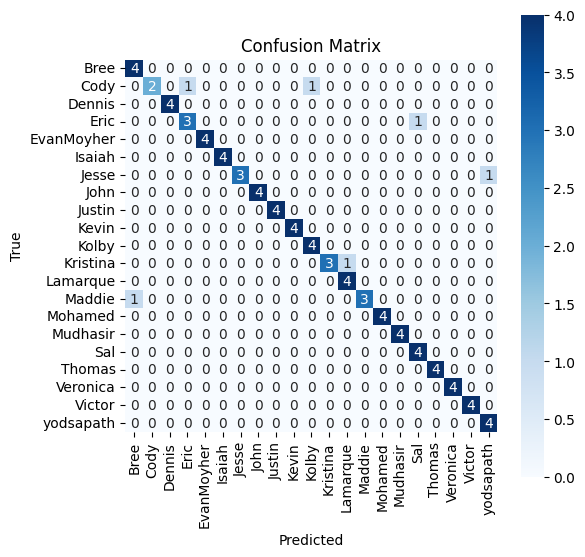

In [23]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dls.vocab, yticklabels=dls.vocab, square=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()